In [1]:
import geopandas as gpd
import pandas as pd
ile_de_france  = gpd.read_file('median_standardLiving_France/Ile-de-France_Arrondissements.shp')
ile_de_france = ile_de_france[['name', 'ref_INSEE','geometry']]
ile_de_france.head()

,name,ref_INSEE,geometry
0,Paris,75056,"POLYGON ((3758912.379 2894585.501, 3758949.844..."
1,Jouy-en-Josas,78322,"POLYGON ((3747725.968 2879406.672, 3747713.484..."
2,Saclay,91534,"POLYGON ((3747725.968 2879406.672, 3747719.983..."
3,Les Loges-en-Josas,78343,"POLYGON ((3744704.931 2881572.655, 3744733.814..."
4,Buc,78117,"POLYGON ((3744066.037 2883653.565, 3744082.210..."


In [2]:
# Find Nan values in geographical code - There are six - Turns out they are no real admin. areas --> will be dropped
ile_de_france.loc[ile_de_france['ref_INSEE'].isnull(),]

,name,ref_INSEE,geometry
1268,Centre administratif,None,"POLYGON ((3780961.594 2885403.992, 3780963.539..."
1269,Mairie de Mennecy,None,"POLYGON ((3763531.624 2856777.675, 3763539.893..."
1270,Centre Administratif Jacques Broz,None,"POLYGON ((3763455.188 2856469.735, 3763455.414..."
1271,Relais Mairie,None,"POLYGON ((3758822.652 2880135.298, 3758826.658..."
1272,Service jeunesse,None,"POLYGON ((3770565.085 2907859.248, 3770583.202..."
1273,Direction des sports,None,"POLYGON ((3770762.141 2907308.451, 3770710.039..."


In [3]:
ile_de_france.dropna(subset= ['ref_INSEE'], inplace=True)

In [4]:
# read median standard of living data
median_Ile = pd.read_excel('median_standardLiving_France/base-cc-filosofi-2017.xlsx', sheet_name='COM', header=4)
median_Ile = median_Ile[['Code géographique', 'Libellé géographique', 'Médiane du niveau de vie (€)']]
median_Ile.columns = ['ref_INSEE', 'name', 'MED17']

In [5]:
# get null values in median data
null_values = median_Ile.loc[median_Ile['MED17'].isnull(), 'ref_INSEE']

In [6]:
# get gas stations to see if area of interest is affected by Null values
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("Paris")
# Initialize the OSM parser object
osm = OSM(fp)
myfilter = {'amenity': ['fuel']}
gas_station = osm.get_buildings(custom_filter=myfilter)
gas_station = gas_station[['id', 'geometry', 'amenity']]
gas_station = gas_station.to_crs(epsg=3035)

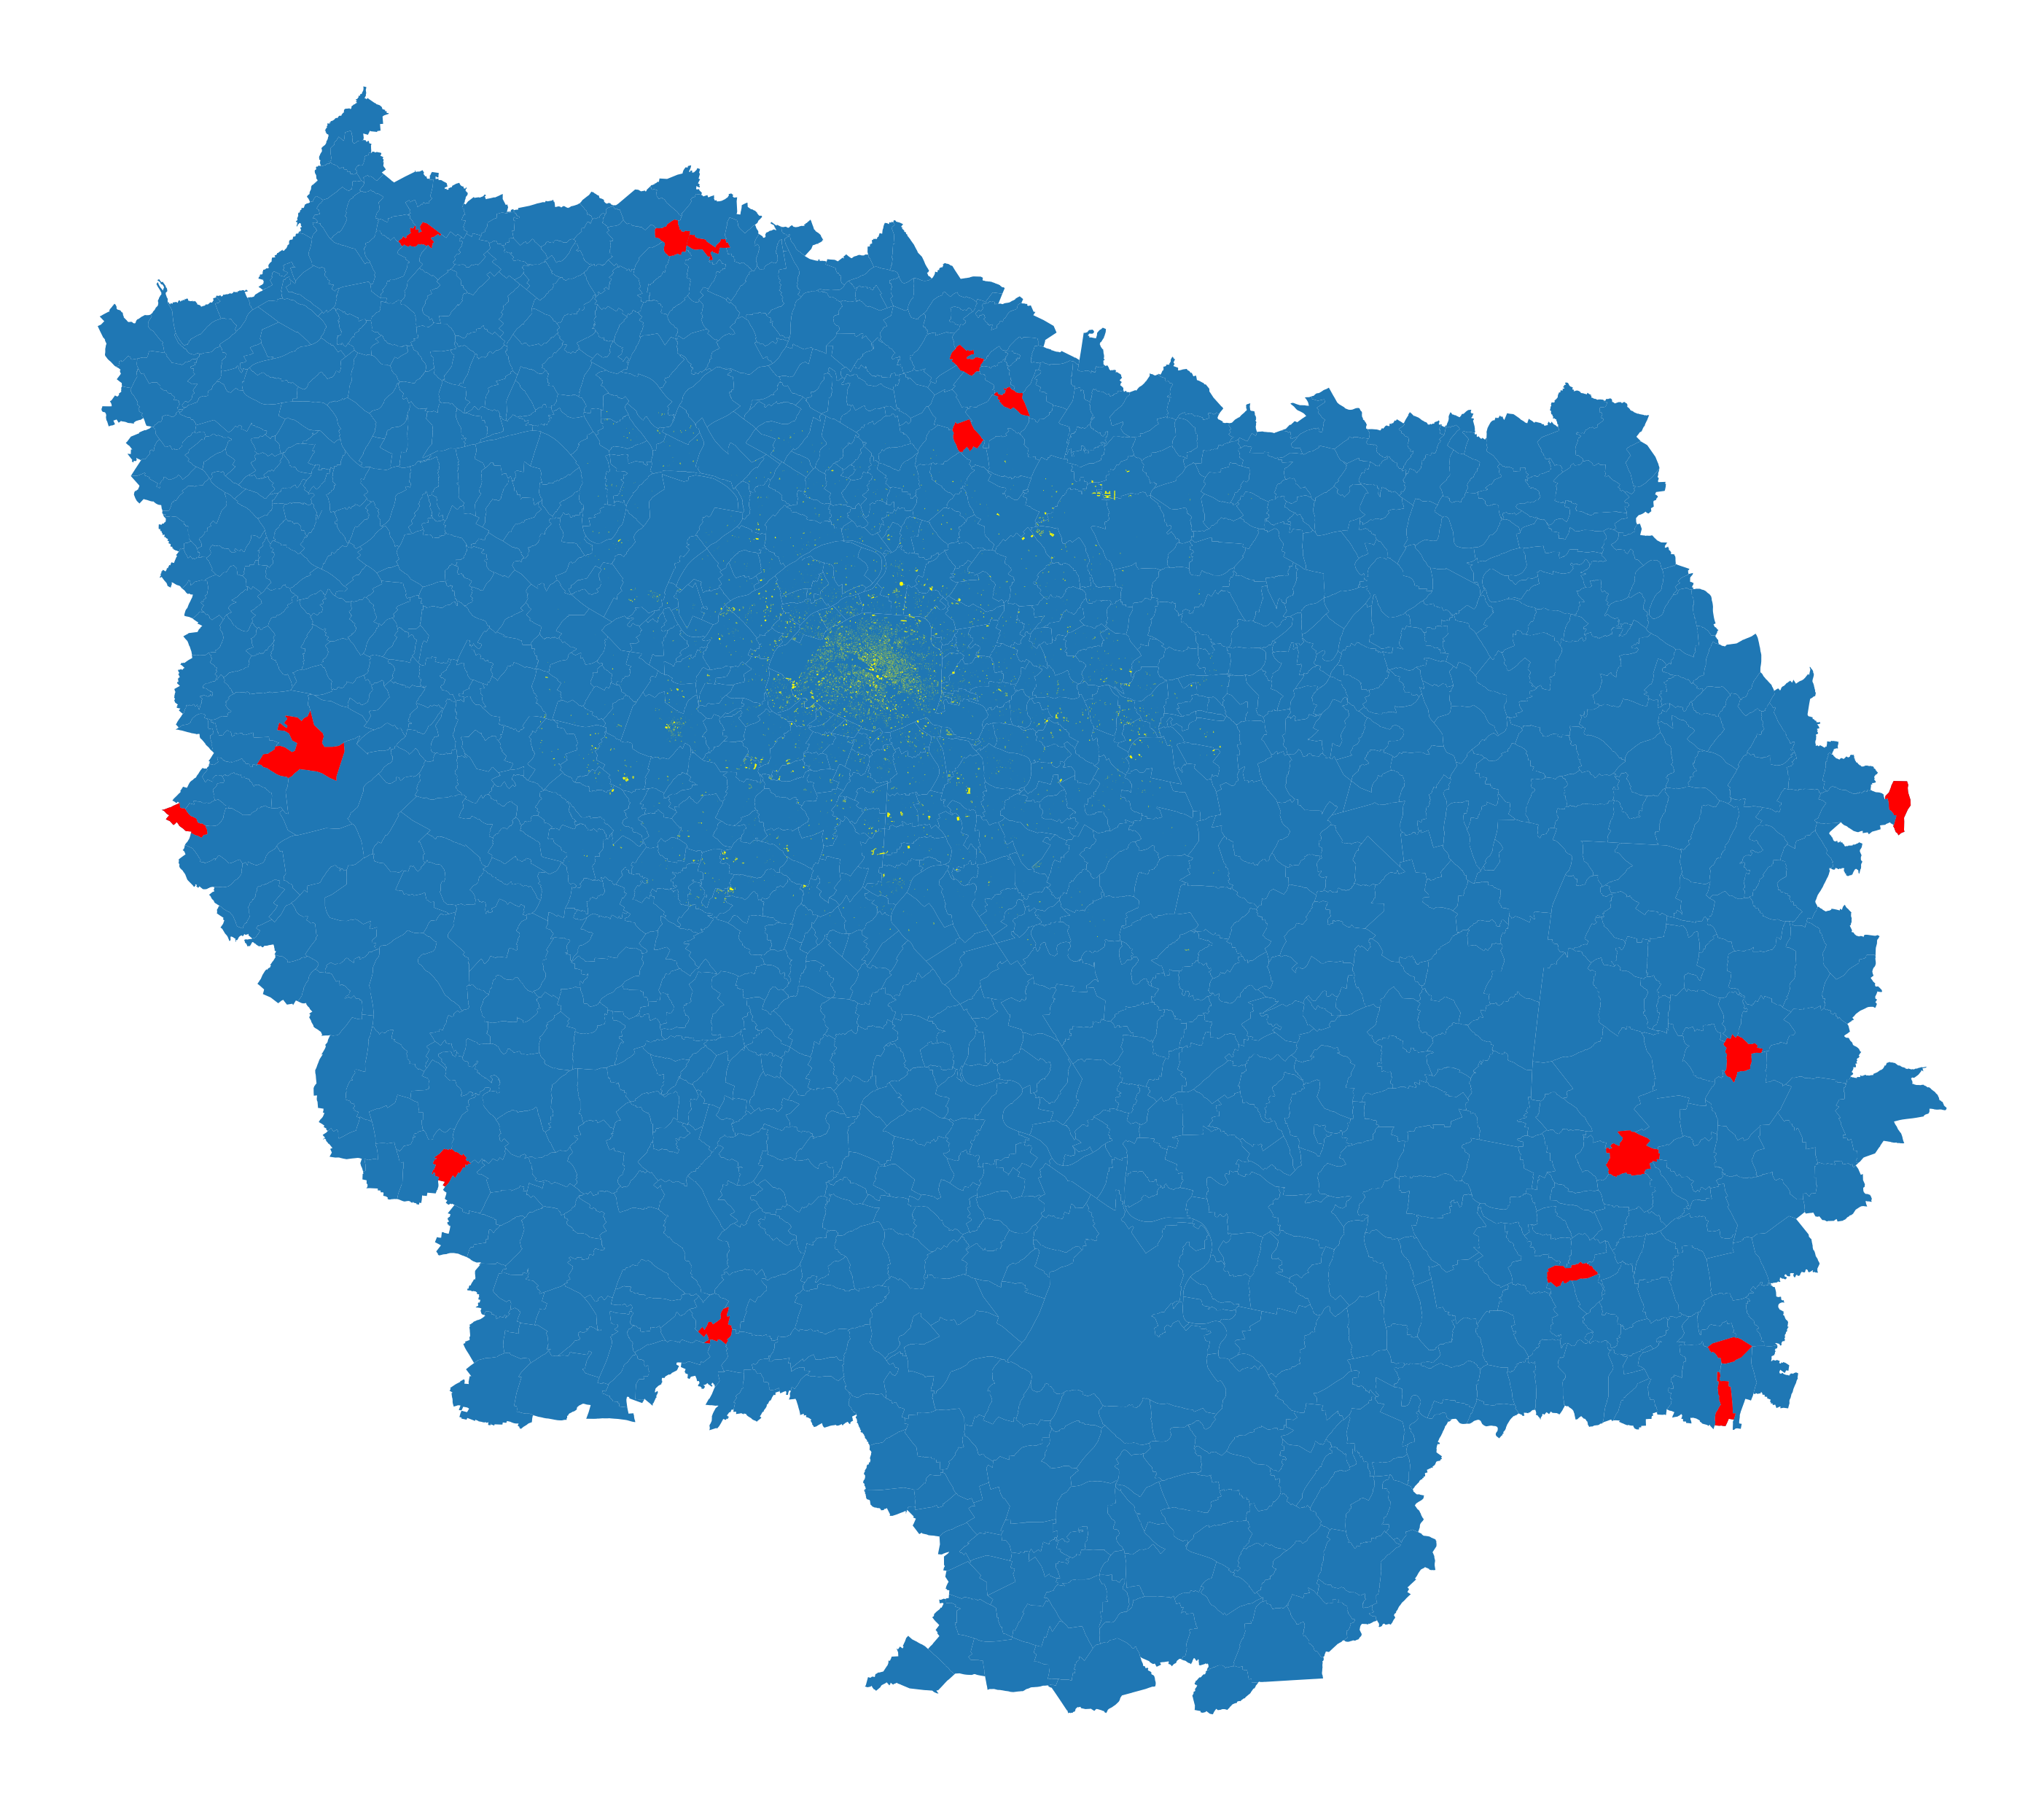

In [7]:
# area of interest is not affected by null values
ax = ile_de_france.plot(figsize= [50,50])
ile_de_france.loc[ile_de_france['ref_INSEE'].isin(null_values), ].plot(ax=ax, color='red')
gas_station.plot(ax=ax, color='yellow')
ax.set_axis_off()

In [13]:
median_ile_de_france = ile_de_france.merge(median_Ile.drop(columns=['name']), how='left', on='ref_INSEE')

In [15]:
# check for duplicates to ensure everything went as expected
sum(median_ile_de_france['ref_INSEE'].value_counts() >=2)

0

In [21]:
# drop NaNs
median_ile_de_france.dropna(subset=['MED17'], inplace=True)

In [25]:
# save the shapefile with the new median information in new shape file
#median_ile_de_france.to_file('medianliving_and_jobdensity/MedianIle-de-France.shp')

In [34]:
# do the same with the 20 Arrondissements of Paris City - no NaNs here
paris = gpd.read_file('median_standardLiving_France/Paris_Arrondissements.shp')
paris = paris[['name', 'ref_INSEE', 'geometry']]

In [35]:
paris_median = paris.merge(median_Ile.drop(columns=['name']), how='left', on='ref_INSEE')

In [36]:
paris_median

,name,ref_INSEE,geometry,MED17
0,Paris 16e Arrondissement,75116,"POLYGON ((3755742.048 2892479.119, 3755753.797...",38900
1,Paris 17e Arrondissement,75117,"POLYGON ((3758912.379 2894585.501, 3758949.844...",30800
2,Paris 15e Arrondissement,75115,"POLYGON ((3754002.905 2887655.394, 3754190.319...",30880
3,Paris 7e Arrondissement,75107,"POLYGON ((3757158.190 2890631.955, 3757190.735...",43270
4,Paris 14e Arrondissement,75114,"POLYGON ((3756702.398 2886389.675, 3756704.144...",27680
5,Paris 12e Arrondissement,75112,"POLYGON ((3764062.518 2886096.301, 3764048.150...",27700
6,Paris 6e Arrondissement,75106,"POLYGON ((3759395.701 2889936.184, 3759411.648...",39330
7,Paris 10e Arrondissement,75110,"POLYGON ((3761997.652 2892463.777, 3762007.874...",26370
8,Paris 20e Arrondissement,75120,"POLYGON ((3765370.188 2888183.374, 3765370.817...",21560
9,Paris 13e Arrondissement,75113,"POLYGON ((3760065.391 2885098.267, 3760054.258...",24110


In [37]:
# save the shapefile with the new median information in new shape file
#paris_median.to_file('medianliving_and_jobdensity/MedianParis.shp')